In [4]:
# Avocado analysis
# Metodos cuantitativos

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy.stats import skew, kurtosis, anderson

In [6]:
avocado_data = pd.read_csv("data/avocado.csv")
avocado_data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [7]:
def createHistogram(data):
    plt.hist(data)
    plt.xlabel("Number")
    plt.ylabel("Frequency")
    plt.show()

In [8]:
def getAverage(data):
    return np.average(data)

In [9]:
def getVar(data):
    return np.var(data)

In [10]:
def getStDv(data):
    return np.std(data)

In [25]:
def getAnderson(data):
    result = anderson(data)
    print('Statistic: %.3f' % result.statistic)
    p = 0
    for i in 2:
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
        else:
            print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

In [26]:
def analyzeVar(idx_num):
    print("Variable analysis of", avocado_data.columns.values[idx_num])
    currVar = avocado_data.iloc[:, idx_num]
    createHistogram(currVar)
    avg = getAverage(currVar)
    var = getVar(currVar)
    stdV = getStDv(currVar)
    print("Average: ", avg)
    print("Variance: ", var)
    print("Standard deviation ", stdV)
    print("Symmetry : ",skew(currVar))
    print("Kurtosis : ",kurtosis(currVar))
    print("Anderson :")
    getAnderson(currVar)
    print('\n')

Variable analysis of Total Bags


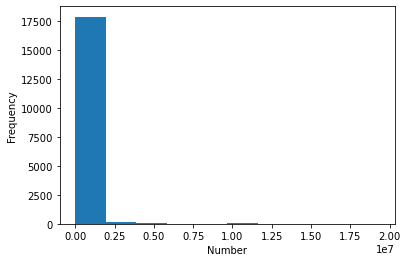

Average:  239639.20205983886
Variance:  972620769882.2756
Standard deviation  986215.3770258684
Symmetry :  9.755269739145234
Kurtosis :  112.24106888264194
Anderson :
Statistic: 4678.828


TypeError: 'int' object is not iterable

In [27]:
analyzeVar(7)
analyzeVar(2)
analyzeVar(3)
analyzeVar(8)